In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt

C:\Users\akrit\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
np.random.seed(42)

In [3]:
n_rows = 10_000_000

In [4]:
# Generating synthetic data
data = {
    'user_id': np.random.randint(1, 1000000, n_rows),
    'age': np.random.randint(18, 90, n_rows),
    'gender': np.random.choice(['Male', 'Female', 'Other'], n_rows),
    'income': np.random.normal(50000, 15000, n_rows).round(2),
    'signup_date': pd.to_datetime('2020-01-01') + pd.to_timedelta(np.random.randint(0, 1000, n_rows), unit='D'),
    'is_active': np.random.choice([True, False], n_rows),
    'country': np.random.choice(['USA', 'Canada', 'UK', 'India'], n_rows)
}

In [5]:
df = pd.DataFrame(data)

In [6]:
df.to_csv('synthetic_users.csv', index=False)

In [7]:
dask_df = dd.read_csv('synthetic_users.csv')
print(dask_df.head())

   user_id  age gender    income signup_date  is_active country
0   121959   36  Other  47737.67  2021-07-18      False     USA
1   671156   32   Male  46291.93  2021-02-01      False     USA
2   131933   58  Other  39600.75  2021-05-10      False   India
3   365839   70   Male  18084.08  2021-11-13       True   India
4   259179   89   Male  46836.86  2022-07-02      False     USA


In [8]:
print(dask_df.info())

<class 'dask.dataframe.core.DataFrame'>
Columns: 7 entries, user_id to country
dtypes: object(3), bool(1), float64(1), int64(2)None


In [9]:
print(dask_df.describe().compute())

            user_id           age        income
count  1.000000e+07  1.000000e+07  1.000000e+07
mean   5.000122e+05  5.349716e+01  4.999105e+04
std    2.887102e+05  2.077895e+01  1.499815e+04
min    1.000000e+00  1.800000e+01 -2.796847e+04
25%    2.504890e+05  3.600000e+01  3.989098e+04
50%    5.007650e+05  5.400000e+01  5.000867e+04
75%    7.507785e+05  7.200000e+01  6.012382e+04
max    9.999990e+05  8.900000e+01  1.318439e+05


In [10]:
print(dask_df['gender'].value_counts().compute())

gender
Male      3333667
Other     3333345
Female    3332988
Name: count, dtype: int64


In [11]:
avg_income_by_country = dask_df.groupby('country')['income'].mean().compute()
print(avg_income_by_country)

country
Canada    50007.946488
India     49994.346374
UK        49985.011905
USA       49976.921354
Name: income, dtype: float64


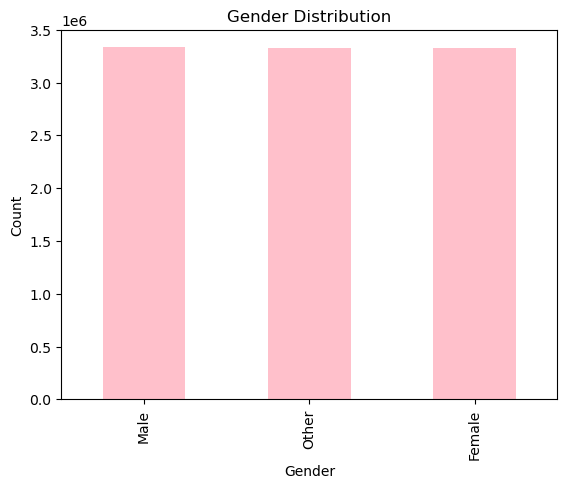

In [12]:
gender_counts = dask_df['gender'].value_counts().compute()
gender_counts.plot(kind='bar', color='pink')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

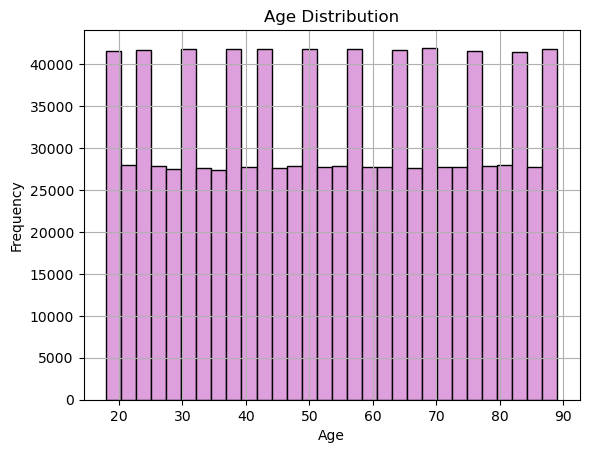

In [13]:
age_sample = dask_df['age'].sample(frac=0.1).compute()

plt.hist(age_sample, bins=30, color='plum', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

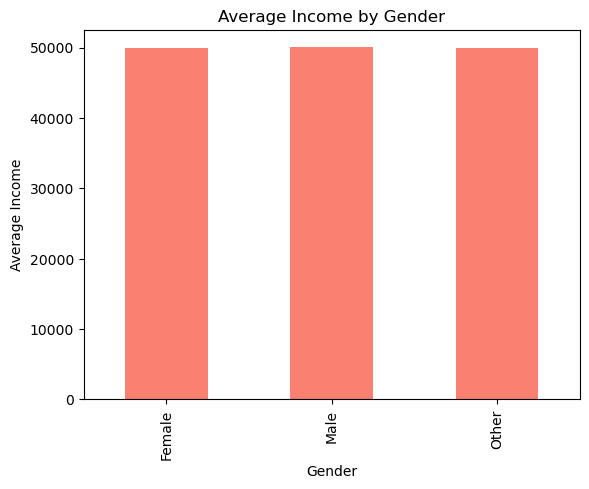

In [14]:
avg_income_gender = dask_df.groupby('gender')['income'].mean().compute()
avg_income_gender.plot(kind='bar', color='salmon')

plt.title("Average Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Income")
plt.show()

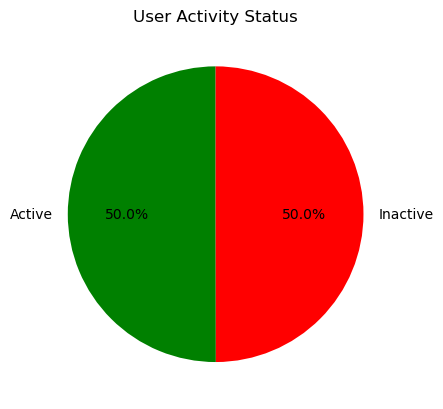

In [15]:
active_counts = dask_df['is_active'].value_counts().compute()
active_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Active', 'Inactive'], colors=['green', 'red'], startangle=90)
plt.title("User Activity Status")
plt.ylabel("")
plt.show()

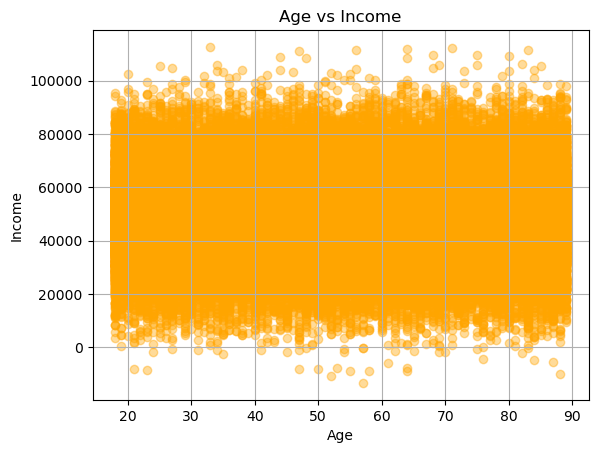

In [16]:
sample_df = dask_df.sample(frac=0.01).compute()

plt.scatter(sample_df['age'], sample_df['income'], alpha=0.4, color='orange')
plt.title("Age vs Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.grid(True)
plt.show()

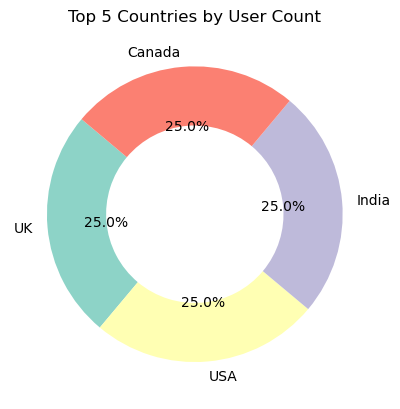

In [17]:
top_countries = dask_df['country'].value_counts().compute().nlargest(5)
colors = plt.cm.Set3.colors

plt.pie(top_countries, labels=top_countries.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'width':0.4})
plt.title("Top 5 Countries by User Count")
plt.show()